# 支持向量机

>需要解决的问题：什么样的决策边界是最好的？

我们要找到最近的样本点的距离最远的决策边界(Large Margin)

### 距离的计算
考虑超平面(hyperplane)上的两点$x',x''$
1. $w^Tx'=-b,w^Tx''=-b$
2. $w\bot hyperplane$:$$(w^T(x''-x'))=0$$ $x''-x'$本身是hyperplane上的一个向量
3. $distance = project(x-x')to \bot hyperplane$:$$distance(x,b,w)=\left|\cfrac{w^T}{\left|\left|w\right|\right|}(x-x')\right|=\cfrac{1}{\left|\left|w\right|\right|}\left|w^Tx+b\right|$$

### 数据标签定义
1. 数据集$(X_1,Y_1),(X_2,Y_2),\cdots,(X_n,Y_n)$
2. Y为样本的类别：X为正例的时候Y=+1，X为负例的时候Y=-1
3. 决策方程：$$y(x)=w^T\Phi(x)+b$$ $$\Rightarrow\begin{align*}y(x_i)>0\Leftrightarrow y_i=+1\\ y(x_i)<0\Leftrightarrow y_i=-1\end{align*}\Rightarrow y_i\cdot y(x_i)>0$$

### 优化的目标
通俗解释：找到Large Margin(w和b)

距离化简为：
$$\cfrac{y_i\cdot\left(w^T\cdot\Phi\left(x_i\right)+b\right)}{\left|\left|w\right|\right|}$$

### 目标函数
1. 放缩变化：对于决策方程，可以通过放缩使得$|Y|\geq1\quad\Rightarrow y_i\cdot\left(w^T\cdot\Phi\left(x_i\right)+b\right)\geq1$
2. 优化目标为：$$argmax_{w,b}\cfrac{1}{\left|\left|w\right|\right|}min_t \left[y_i\cdot\left(w^T\cdot\Phi(x_i)+b\right)\right]$$
3. 由于$y_i\cdot\left(w^T\cdot\Phi(x_i)+b\right)\geq1$，则只需要考虑$$argmax_{w,b}\cfrac{1}{\left|\left|w\right|\right|}$$这即是目标函数
4. 当前目标：$max_{w,b}\cfrac{1}{\left|\left|W\right|\right|}$，约束条件：$y_i\cdot\left(w^T\cdot\Phi(x_i)+b\right)\geq1$
5. 思路：将极大值问题转化为极小值问题$\Rightarrow min_{w,b}\cfrac12 w^2$

### 拉格朗日乘子法
带约束的优化问题：
$$
\begin{align*}
 min_x f_0(x)\\
 subject\quad to\quad& f_i(x)\leq0,i=1,\cdots,m\\
            & h_i(x)=0,i=1,\cdots,q
\end{align*}
$$

得到式子
$$
L(w,b,a)=\cfrac12\left|\left|w\right|\right|^2-\sum^n_{i=1}\alpha_i\left(y_i\left(w^T\cdot\Phi(x_i)+b\right)-1\right)
$$

### __SVM求解__
由KKT条件(也即满足下式的要求)
$$
\left\{
\begin{aligned}
        &\alpha_i\geq0\\
        &y_if(x_i)-1\geq0\\
        &\alpha_i(y_if(x_i)-1)=0
\end{aligned}
\right.
$$

对w和b分别求偏导，再由对偶性质，得到下面的条件：
$$\mathop{min}\limits_{w,b}\mathop{max}\limits_{\alpha}L(w,b,\alpha)\rightarrow \mathop{max}\limits_{\alpha}\mathop{min}\limits_{w,b}L(w,b,\alpha)$$

偏导数如下：
$$
\begin{align*}
&\cfrac{\partial L}{\partial w}=0\Rightarrow w=\sum_{i=1}^n\alpha_iy_i\Phi\left(x_n\right)\\
& \cfrac{\partial L}{\partial b}=0\Rightarrow 0=\sum_{i=1}^{n}\alpha_iy_i
\end{align*}
$$

带入得到：
$$
\begin{align*}
L(w,b,\alpha)&=\cfrac12\left|\left|w\right|\right|^2-\sum^n_{i=1}\alpha_i\left(y_i\Phi(x_i0+b\right)-1)\\
&=\cfrac12w^Tw-w^T\sum^n_{i=1}\alpha_iy_i+\sum^n_{i=1}\alpha_i\\
&=\sum^n_{i1}\alpha_i-\cfrac12\left(\sum^n_{i=1}\alpha_iy_i\Phi(x_i)\right)^T\sum^n_{i=1}\alpha_iy_i\Phi(x_i)\\
&=\sum^n_{i_1}\alpha_i-\cfrac12\sum^n_{i=1,j=1}\alpha_i\alpha_jy_iy_j\Phi^T(x_i)\Phi(x_j)
\end{align*}
$$

至此已经完成了对w,b求最小，接下来继续对$\alpha$求极大值，首先可以加符号从而转化为求极小值
$$
\mathop{min}\limits_{\alpha}\cfrac12\sum^n_{i=1}\sum^n_{j=1}\alpha_i\alpha_jy_ij_i\left(\Phi(x_i\cdot\Phi(x_j)\right)-\sum^n_{i1}\alpha_i
$$
其中约束条件为$\sum^n_{i=1}\alpha_iy_i=0\qquad \alpha\geq0$

### 支持向量
即边界上的向量，支持向量机的结果与非边界点无关

### __软间隔Soft-margin__
有时数据中有噪音，不能全部都严格考虑，于是引入松弛因子
$$
y_i(w^T\cdot x_i+b)\geq1-\xi_i
$$

则新的目标函数：
$$
min\cfrac12\left|\left|w\right|\right|^2+C\sum^n_{n=i}\xi_i
$$
其中，C很大的时候，意味着分类更严格；C很小的时候，则对误差有较大的容忍程度

对加入软间隔的目标函数使用拉格朗日乘子法
$$
L(w,b,\xi,\alpha,\mu)=\cfrac12\left|\left|w\right|\right|^2+C\sum^n_{i=1}\xi_i-\sum^n_{i=1}\alpha_i\left(y_i\left(w\cdot x_i+b\right)1+\xi_i\right)-\sum^n_{i=1}\mu_i\xi_i
$$

求偏导后可以得到以下约束
$$
\left\{
\begin{aligned}
        &w=\sum^n_{i=1}\alpha_iy_i\phi(x_n)\\
        &0=\sum^n_{i=1}\alpha_iy_i\\
        &C-\alpha_i-\mu_i=0\\
        &\alpha_i\geq0,\quad \mu_i\geq0
\end{aligned}
\right.
$$

接下来求
$$
\left\{
\begin{aligned}
        &\mathop{min}\limits_{\alpha}\cfrac12\sum^n_{i=1}\sum^n_{j=1}\alpha_i\alpha_jy_iy_j\left(x_i\cdot x_j\right)-\sum^n_{i=1}\alpha_i\\
        &\sum^n_{i=1}\alpha_iy_i=0\\
        &0\leq\alpha_i\leq C
\end{aligned}
\right.
$$

### 核函数
原本的数据点可能线性不可分，但是可以通过一个映射$\Phi(x):x\rightarrow\varphi(x)$，使得数据点被映射到高维空间，数据点在高维空间线性可分

由于原本的$\phi(x)$可能很复杂，在计算的时候复杂度很高，于是我们引入核函数$K(x_i,j_i)$，来简化计算$\varphi(x_i)$和$\varphi(x_j)$的内积

__核函数的条件__

对于函数$K(x,l)=<\varphi(x),\varphi(z)>$，当矩阵$\left(K(x_i,x_j)\right)_{i=1,j=1}^{n,n}$为半正定矩阵时，$K(x,l)$可以作为核函数。这只是一个充分条件，而不是必要条件，也有不是半正定的函数可以作为核函数。其中$<\cdot,\cdot>$表示向量内积。

使用映射$\Phi(x):x\rightarrow\varphi(x)$之后，我们的优化目标变成了
$$
\mathop{min}\limits_{\alpha}\cfrac12\sum^n_{i=1}\sum^n_{j=1}\alpha_i\alpha_jy_iy_j\left(\varphi(x_i)\cdot \varphi(x_j)\right)-\sum^n_{i=1}\alpha_i
$$

在引入核函数：
$$
\mathop{min}\limits_{\alpha}\cfrac12\sum^n_{i=1}\sum^n_{j=1}\alpha_i\alpha_jy_iy_jK(x_i,x_j)-\sum^n_{i=1}\alpha_i
$$

最后得到的分类模型为：
$$
f(x)=\sum^n_{i=1}\alpha_iy_iK(x_i,x)+b
$$

### __常用核函数__
__线性核__

$$K(x_i,x_j)=x^T_ix_j$$

__多项式核__

$$K(x_i,x_j)=\left(x_i^T,x_j\right)^d$$
其中$d\geq1$为多项式的次数

__高斯核__

$$K(x_i,x_j)=exp\left(-\cfrac{(\left|\left|x_i-x_j\right|\right|)^2}{2\sigma^2}\right)$$
$\sigma>0$为高斯核的带宽

__拉普拉斯核__

$$K(x_i,x_j)=exp\left(-\cfrac{\left|\left|x_i-x_j\right|\right|}{\sigma}\right)$$
$\sigma>0$

__Sigmoid核__

$$K(x_i,x_j)=tanh(\beta x_i^Tx_j+\theta)$$
tanh为双曲正切函数，$\beta>0$，$\theta<0$

# 先使用sklearn中的SVM进行实验

In [68]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import os
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:,(2,3)]
y = iris.target

flower_1or2=(y==0)|(y==1)
X = X[flower_1or2]
y = y[flower_1or2]

svm_clf = SVC(kernel='linear',C=100000)
svm_clf.fit(X,y)

SVC(C=100000, kernel='linear')

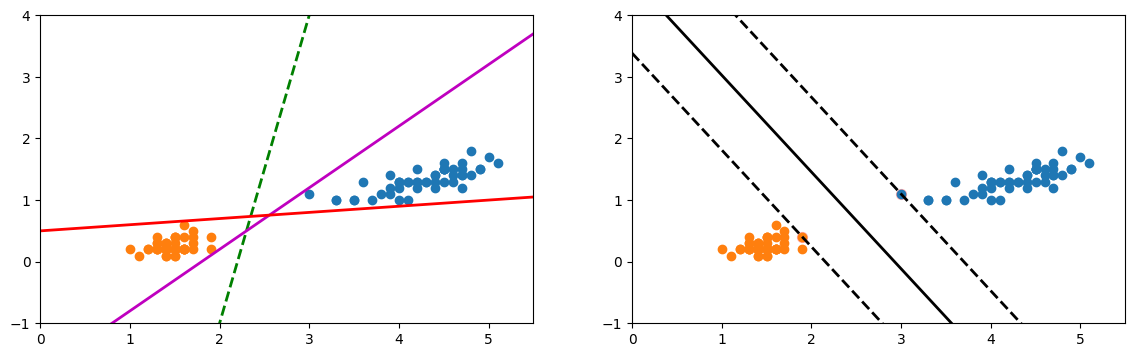

In [69]:
x0 = np.linspace(0,5.5,200)
pred1 = 5*x0-11
pred2 = x0-1.8
pred3 = 0.1*x0+0.5

def plot_svc_decision_boundary(svm_clf,xmin,xmax,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = (-w[0]*x0-b)/w[1]
    margin=1/w[1]
    gutter_up = decision_boundary+margin
    gutter_down = decision_boundary-margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=50,facecolor='#FFAAAA')
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x0,pred1,'g--',linewidth=2)
plt.plot(x0,pred2,'m-',linewidth=2)
plt.plot(x0,pred3,'r-',linewidth=2)

plt.scatter(X[y==1][:,0],X[y==1][:,1])
plt.scatter(X[y==0][:,0],X[y==0][:,1])
plt.axis([0,5.5,-1,4])
plt.subplot(122)
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.scatter(X[y==1][:,0],X[y==1][:,1])
plt.scatter(X[y==0][:,0],X[y==0][:,1])
plt.axis([0,5.5,-1,4])
plt.show()

In [89]:
import numpy as np
class SVM:
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma='scale'):
        '''
        SVM初始化函数
        
        Parameters:
        C (float): 松弛变量的系数，默认为1.0
        kernel (str): 核函数的类型，默认为线性核函数
        degree (int): 多项式核函数的次数，默认为3
        gamma (str or float): 径向基核函数的参数，默认为'scale'
                              如果为'scale'，则gamma=1 / (2 * n_features)
        
        Returns:
        None
        '''
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.support_vectors = None
        self.support_vector_labels = None
        self.weights = None
        self.bias = None
    
    def _kernel_function(self, X1, X2):
        '''
        计算核函数的值
        
        Parameters:
        X1 (array-like): 输入数据1，shape为(n_samples1, n_features)
        X2 (array-like): 输入数据2，shape为(n_samples2, n_features)
        
        Returns:
        kernel_matrix (array-like): 核矩阵，shape为(n_samples1, n_samples2)
        '''
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'poly':
            return (np.dot(X1, X2.T) + 1) ** self.degree
        elif self.kernel == 'rbf':
            gamma = 1 / (2 * self.gamma ** 2)
            diffs = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]
            return np.exp(-gamma * np.linalg.norm(diffs, axis=-1) ** 2)
        else:
            raise ValueError("Invalid kernel.")
    
    def _compute_loss(self, X, y):
        '''
        计算损失函数的值
        
        Parameters:
        X (array-like): 输入数据，shape为(n_samples, n_features)
        y (array-like): 输入标签，shape为(n_samples,)
        
        Returns:
        loss (float): 损失函数的值
        '''
        margin = y * (np.dot(X, self.weights) + self.bias)
        hinge_loss = np.maximum(0, 1 - margin)
        loss = 0.5 * np.dot(self.weights, self.weights) + self.C * np.mean(hinge_loss)
        return loss
    
    def fit(self, X, y, learning_rate=0.01, n_iters=1000, verbose=False):
        '''
        拟合模型
        
        Parameters:
        X (array-like): 输入数据，shape为(n_samples, n_features)
        y (array-like): 输入标签，shape为(n_samples,)
        learning_rate (float): 学习率，默认为0.01
        n_iters (int): 迭代次数，默认为1000
        verbose (bool): 是否输出迭代过程中的损失值，默认为False
        
        Returns:
        None
        '''
        n_samples, n_features = X.shape
        
        # 初始化权重和偏置项
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 选择一部分样本作为支持向量
        support_mask = np.zeros(n_samples, dtype=bool)
        random_indices = np.random.choice(range(n_samples), size=n_samples // 10, replace=False)
        support_mask[random_indices] = True
        self.support_vectors = X[support_mask]
        self.support_vector_labels = y[support_mask]
        
        # 使用随机梯度下降法拟合模型
        for i in range(n_iters):
            idx = np.random.choice(range(n_samples))
            x = X[idx]
            label = y[idx]
            
            # 计算选中样本和支持向量间的核矩阵
            kernel_matrix = self._kernel_function(x, self.support_vectors)
            
            # 计算预测值和hinge loss
            prediction = np.dot(kernel_matrix, self.support_vector_labels) * label
            hinge_loss = np.maximum(0, 1 - prediction)
            
            # 更新权重和偏置项
            if hinge_loss > 0:
                gradient_weights = -np.dot(kernel_matrix, self.support_vector_labels) * label
                gradient_bias = -label
                self.weights -= learning_rate * (self.weights / n_samples - self.C * gradient_weights)
                self.bias -= learning_rate * self.C * gradient_bias
            
            # 检查收敛情况，并在verbose为True时打印损失值
            if (i + 1) % 100 == 0 and verbose:
                loss = self._compute_loss(X, y)
                print(f"Iteration {i + 1}/{n_iters}, Loss: {loss:.4f}")
    
    def predict(self, X):
        '''
        预测函数
        
        Parameters:
        X (array-like): 输入数据，shape为(n_samples, n_features)
        
        Returns:
        predictions (array-like): 预测结果，shape为(n_samples,)
        '''
        kernel_matrix = self._kernel_function(X, self.support_vectors)
        prediction = np.dot(kernel_matrix, self.support_vector_labels) * np.sign(self.bias)
        return np.sign(prediction)

In [90]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([-1, -1, 1, 1])
# 创建并训练支持向量机模型
svm = SVM()
svm.fit(X, y, learning_rate=0.01, n_iters=1000, verbose=True)
# 进行预测
X_test = np.array([[0, 0], [9, 10]])
predictions = svm.predict(X_test)
print(predictions)  # 预计输出: [-1 1]

Iteration 100/1000, Loss: 1.0000
Iteration 200/1000, Loss: 1.0000
Iteration 300/1000, Loss: 1.0000
Iteration 400/1000, Loss: 1.0000
Iteration 500/1000, Loss: 1.0000
Iteration 600/1000, Loss: 1.0000
Iteration 700/1000, Loss: 1.0000
Iteration 800/1000, Loss: 1.0000
Iteration 900/1000, Loss: 1.0000
Iteration 1000/1000, Loss: 1.0000
[0. 0.]


In [91]:
from sklearn import svm
class MySVM:
    def __init__(self, kernel='linear', C=1.0, gamma='scale'):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.support_vector_machine = svm.SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
    
    def fit(self, X, y):
        self.support_vector_machine.fit(X, y)
    
    def predict(self, X):
        return self.support_vector_machine.predict(X)

In [92]:
# 导入相应的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 导入数据集
iris = load_iris()
X = iris.data
y = iris.target
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建SVM实例
svm_model = MySVM(kernel='linear')
# 拟合训练数据
svm_model.fit(X_train, y_train)
# 预测测试数据
y_pred = svm_model.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [93]:
import numpy as np
class SVM:
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma='scale'):
        self.C = C  # 正则化参数
        self.kernel = kernel  # 核函数类型，支持线性、多项式和RBF
        self.degree = degree  # 多项式核函数的阶数，默认为3
        self.gamma = gamma  # RBF核函数的参数，默认为'scale'
        self.support_vectors = None  # 支持向量
        self.support_vector_labels = None  # 支持向量对应的标签
        self.alpha = None  # 拉格朗日乘子
        self.b = 0.0  # 截距
    def fit(self, X, y):
        # 将标签y转换为1和-1
        y = np.where(y==1, 1, -1)
        self._train(X, y)
    def predict(self, X):
        scores = self._decision_function(X)
        return np.where(scores >= 0, 1, -1)
    def _train(self, X, y):
        n_samples, n_features = X.shape
        # 计算Gram矩阵
        K = self._gram_matrix(X)
        # 初始化alpha和b
        self.alpha = np.zeros(n_samples)
        self.b = 0.0
        # 根据SMO算法进行优化
        tol = 1e-3  # 阈值
        max_iter = 5000  # 最大迭代次数
        passes = 0
        while passes < max_iter:
            num_changed_alphas = 0
            for i in range(n_samples):
                error_i = self._decision_function(X[i]) - y[i]
                if (y[i] * error_i < -tol and self.alpha[i] < self.C) or (y[i] * error_i > tol and self.alpha[i] > 0):
                    j = self._select_second_alpha(i, n_samples)
                    error_j = self._decision_function(X[j]) - y[j]
                    alpha_i_old, alpha_j_old = self.alpha[i], self.alpha[j]
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                    if L == H:
                        continue
                    eta = 2.0 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue
                    self.alpha[j] -= y[j] * (error_i - error_j) / eta
                    self.alpha[j] = min(H, self.alpha[j])
                    self.alpha[j] = max(L, self.alpha[j])
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
                    self.alpha[i] += y[i] * y[j] * (alpha_j_old - self.alpha[j])
                    b1 = self.b - error_i - y[i] * (self.alpha[i] - alpha_i_old) * K[i, i] - y[j] * (self.alpha[j] - alpha_j_old) * K[i, j]
                    b2 = self.b - error_j - y[i] * (self.alpha[i] - alpha_i_old) * K[i, j] - y[j] * (self.alpha[j] - alpha_j_old) * K[j, j]
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2.0
                    num_changed_alphas += 1
            passes += 1
            if num_changed_alphas == 0:
                break
        # 提取支持向量
        self.support_vectors = X[self.alpha > 0]
        self.support_vector_labels = y[self.alpha > 0]
    def _decision_function(self, X):
        if self.kernel == 'linear':
            return np.dot(self.alpha * self.support_vector_labels,
                          self._linear_kernel(self.support_vectors, X)) + self.b
        elif self.kernel == 'poly':
            return np.dot(self.alpha * self.support_vector_labels,
                          self._polynomial_kernel(self.support_vectors, X)) + self.b
        elif self.kernel == 'rbf':
            return np.dot(self.alpha * self.support_vector_labels,
                          self._rbf_kernel(self.support_vectors, X)) + self.b
    def _select_second_alpha(self, first_alpha, n_samples):
        second_alpha = first_alpha
        while second_alpha == first_alpha:
            second_alpha = np.random.randint(0, n_samples)
        return second_alpha
    def _gram_matrix(self, X):
        if self.kernel == 'linear':
            return self._linear_kernel(X, X)
        elif self.kernel == 'poly':
            return self._polynomial_kernel(X, X)
        elif self.kernel == 'rbf':
            return self._rbf_kernel(X, X)
    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)
    def _polynomial_kernel(self, X1, X2):
        return (np.dot(X1, X2.T) + 1) ** self.degree
    def _rbf_kernel(self, X1, X2):
        gamma = None if self.gamma == 'scale' else self.gamma
        return np.exp(-self.gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=-1) ** 2)